In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Load your dataset
# Replace 'your_dataset.csv' with the actual file name
dataset = pd.read_excel('Final Data (2).xlsx')
dataset.head()

,Year,Month,GEO_Type,GEO_Name,CPI,Median Income,MORTGAGE,Population,Unemployment Rate,GDP,Index_NSA,Index_SA
0,2001,1,CBSA,Flagstaff AZ,100.0,42700,7.0325,117.803,5.7,255.054,100.166373,100.317900
1,2001,2,CBSA,Flagstaff AZ,100.0,42700,7.0500,117.803,5.1,255.054,100.587714,100.754905
2,2001,3,CBSA,Flagstaff AZ,100.0,42700,6.9520,117.803,4.9,255.054,101.406908,101.377258
3,2001,4,CBSA,Flagstaff AZ,100.0,42700,7.0775,117.803,4.2,255.054,102.258746,102.000521
4,2001,5,CBSA,Flagstaff AZ,100.0,42700,7.1450,117.803,3.6,255.054,102.884394,102.451169


In [ ]:
# Get unique GEO_Names from the dataset
geo_names = dataset['GEO_Name'].unique()

# Loop through each GEO_Name
for geo_name in geo_names:
    # Filter data for the specific GEO_Name
    geo_data = dataset[dataset['GEO_Name'] == geo_name]

    # Check if there are samples for the current GEO_Name
    if geo_data.shape[0] == 0:
        print(f"No data found for {geo_name}. Skipping...")
        continue

    # Split data into training and validation sets
    training_data_geo = geo_data[geo_data['Year'] <= 2019]
    validation_future_data_geo = geo_data[geo_data['Year'] > 2019]

    # Extract features and target variable
    features = ['CPI', 'Median Income', 'MORTGAGE', 'Population', 'Unemployment Rate', 'GDP']
    target_variable = 'Index_NSA'

    # Preprocess data
    scaler = MinMaxScaler()
    X_train_geo = scaler.fit_transform(training_data_geo[features])
    y_train_geo = training_data_geo[target_variable].values

    X_val_future_geo = scaler.transform(validation_future_data_geo[features])
    y_val_future_geo = validation_future_data_geo[target_variable].values

    # Set up the RNN model with increased complexity
    model_geo = Sequential()
    model_geo.add(LSTM(units=200, activation='relu', input_shape=(X_train_geo.shape[1], 1), return_sequences=True))
    model_geo.add(LSTM(units=100, activation='relu'))
    model_geo.add(Dense(units=1))

    # Compile the model with the specified learning rate
    model_geo.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

    # Train the model with increased patience for early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    model_geo.fit(X_train_geo, y_train_geo, epochs=50, batch_size=32, validation_data=(X_val_future_geo, y_val_future_geo), callbacks=[early_stopping], verbose=2)

    # Make predictions for the future values
    X_future_geo = scaler.transform(validation_future_data_geo[features])
    predictions_future_geo = model_geo.predict(X_future_geo)

    # Print or use the predictions_future_geo as needed
    print(f"Predictions for {geo_name}:")
    print(predictions_future_geo)


Epoch 1/50
8/8 - 4s - loss: 27753.1230 - val_loss: 89203.9141 - 4s/epoch - 556ms/step
Epoch 2/50
8/8 - 0s - loss: 27748.1328 - val_loss: 89190.6953 - 380ms/epoch - 47ms/step
Epoch 3/50
8/8 - 0s - loss: 27743.4355 - val_loss: 89177.1406 - 335ms/epoch - 42ms/step
Epoch 4/50
8/8 - 0s - loss: 27738.3203 - val_loss: 89162.0938 - 400ms/epoch - 50ms/step
Epoch 5/50
8/8 - 0s - loss: 27732.0234 - val_loss: 89142.4688 - 416ms/epoch - 52ms/step
Epoch 6/50
8/8 - 0s - loss: 27724.2285 - val_loss: 89117.9453 - 214ms/epoch - 27ms/step
Epoch 7/50
8/8 - 0s - loss: 27714.4668 - val_loss: 89086.3828 - 224ms/epoch - 28ms/step
Epoch 8/50
8/8 - 0s - loss: 27702.2363 - val_loss: 89045.9141 - 240ms/epoch - 30ms/step
Epoch 9/50
8/8 - 0s - loss: 27686.6094 - val_loss: 88991.5781 - 228ms/epoch - 29ms/step
Epoch 10/50
8/8 - 0s - loss: 27665.9316 - val_loss: 88915.6406 - 213ms/epoch - 27ms/step
Epoch 11/50
8/8 - 0s - loss: 27637.3262 - val_loss: 88805.0547 - 210ms/epoch - 26ms/step
Epoch 12/50
8/8 - 0s - loss: 275

2/2 [==============================] - 0s 22ms/step
Predictions for Sierra Vista-Douglas AZ:
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Epoch 1/50
8/8 - 4s - loss: 21238.0137 - val_loss: 58171.7266 - 4s/epoch - 556ms/step
Epoch 2/50
8/8 - 0s - loss: 21233.8359 - val_loss: 58161.0703 - 399ms/epoch - 50ms/step
Epoch 3/50
8/8 - 0s - loss: 21229.3828 - val_loss: 58149.5039 - 394ms/epoch - 49ms/step
Epoch 4/50
8/8 - 0s - loss: 21224.5586 - val_loss: 58136.2344 - 394ms/epoch - 49ms/step
Epoch 5/50
8/8 - 0s - loss: 21218.9609 - val_loss: 58120.4414 - 388ms/epoch - 49ms/step
Epoch 6/50
8/8 - 0s - loss: 21212.1719 - val_loss: 58100.4922 - 395ms/epoch - 49ms/step
Epoch 7/50
8/8 - 0s - loss: 21203.6133 - val_loss: 58074.3125 - 338ms/epoch - 42ms/step
Epoch 8/50
8/8 - 0s - loss: 21192.4492 -

2/2 [==============================] - 0s 11ms/step
Predictions for Tucson AZ:
[[213.18767]
 [211.79869]
 [212.22386]
 [215.74275]
 [213.95055]
 [212.82985]
 [215.0816 ]
 [213.33684]
 [212.6975 ]
 [211.91599]
 [211.27449]
 [210.72102]
 [228.8386 ]
 [229.25119]
 [231.18051]
 [230.87727]
 [229.91338]
 [230.32066]
 [250.52094]
 [249.9894 ]
 [250.09059]
 [251.18202]
 [250.92622]
 [251.05562]
 [298.31073]
 [301.2125 ]
 [304.85806]
 [312.61218]
 [315.11435]
 [318.3281 ]
 [351.1371 ]
 [349.2771 ]
 [358.1418 ]
 [366.19376]
 [364.9243 ]
 [360.23206]]
Epoch 1/50
8/8 - 4s - loss: 20383.5781 - val_loss: 48645.7227 - 4s/epoch - 475ms/step
Epoch 2/50
8/8 - 0s - loss: 20378.3008 - val_loss: 48633.9375 - 245ms/epoch - 31ms/step
Epoch 3/50
8/8 - 0s - loss: 20373.2539 - val_loss: 48622.4062 - 226ms/epoch - 28ms/step
Epoch 4/50
8/8 - 0s - loss: 20368.1484 - val_loss: 48610.2500 - 223ms/epoch - 28ms/step
Epoch 5/50
8/8 - 0s - loss: 20362.6602 - val_loss: 48596.3281 - 231ms/epoch - 29ms/step
Epoch 6/50
8/8

In [ ]:
# Handle missing values
training_data = geo_data[geo_data['Year'] <= 2019]
validation_future_data = geo_data[geo_data['Year'] > 2019]

training_data = training_data.dropna()
validation_future_data_geo = validation_future_data.dropna()

# Handle infinite values
training_data = training_data.replace([np.inf, -np.inf], np.nan).dropna()
validation_future_data = validation_future_data.replace([np.inf, -np.inf], np.nan).dropna()


In [ ]:
# Define function for preparing data for RNN
def prepare_rnn_data(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[features].iloc[i:i+sequence_length].values)
        y.append(data[target_variable].iloc[i+sequence_length])
    return np.array(X), np.array(y)

# Set sequence length
sequence_length = 10  # You may need to adjust this based on your data


In [ ]:
# Prepare data for RNN
X_train, y_train = prepare_rnn_data(training_data, sequence_length)
X_val_future, y_val_future = prepare_rnn_data(validation_future_data, sequence_length)

# Create and train the RNN model
def create_rnn_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
    return model

model = create_rnn_model((X_train.shape[1], X_train.shape[2]))
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val_future, y_val_future))


Epoch 1/50
7/7 [==============================] - 2s 57ms/step - loss: 21070098.0000 - val_loss: 888863.6875
Epoch 2/50
7/7 [==============================] - 0s 14ms/step - loss: 788534.3750 - val_loss: 4356863.5000
Epoch 3/50
7/7 [==============================] - 0s 14ms/step - loss: 2033190.8750 - val_loss: 1417192.6250
Epoch 4/50
7/7 [==============================] - 0s 16ms/step - loss: 290329.0000 - val_loss: 219933.6094
Epoch 5/50
7/7 [==============================] - 0s 15ms/step - loss: 272984.7812 - val_loss: 610986.8125
Epoch 6/50
7/7 [==============================] - 0s 15ms/step - loss: 252205.2812 - val_loss: 66475.0938
Epoch 7/50
7/7 [==============================] - 0s 14ms/step - loss: 70953.0703 - val_loss: 104824.4609
Epoch 8/50
7/7 [==============================] - 0s 14ms/step - loss: 103249.8594 - val_loss: 136940.5625
Epoch 9/50
7/7 [==============================] - 0s 14ms/step - loss: 77479.6328 - val_loss: 15472.8555
Epoch 10/50
7/7 [===================

In [ ]:
# Make predictions for future values
X_future = prepare_rnn_data(validation_future_data, sequence_length)[0]
predictions_future = model.predict(X_future)

# Optionally, you can inverse transform the predictions if you scaled the data before training
# predictions_future = scaler.inverse_transform(predictions_future)

# Print or use the predictions_future as needed
print("Predictions for the future:")
print(predictions_future)

1/1 [==============================] - 0s 257ms/step
Predictions for the future:
[[302.02576]
 [302.01697]
 [302.1078 ]
 [288.97156]
 [235.68886]
 [236.76503]
 [215.04286]
 [207.43007]
 [226.30898]
 [247.92519]
 [262.77478]
 [298.4906 ]
 [322.62976]
 [322.65076]
 [322.55505]
 [314.2621 ]
 [276.71277]
 [265.92566]
 [260.5365 ]
 [254.45155]
 [267.4193 ]
 [281.6371 ]
 [291.036  ]
 [315.3114 ]
 [331.33972]
 [331.37585]]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Evaluate the model on the training set
train_predictions = model.predict(X_train)
train_rmse = sqrt(mean_squared_error(y_train, train_predictions))
train_mse = mean_squared_error(y_train, train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)

print(f"Training RMSE: {train_rmse}")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")

# Evaluate the model on the validation set
val_predictions_future = model.predict(X_val_future)
val_rmse_future = sqrt(mean_squared_error(y_val_future, val_predictions_future))
val_mse_future = mean_squared_error(y_val_future, val_predictions_future)
val_mae_future = mean_absolute_error(y_val_future, val_predictions_future)

print(f"Validation Future RMSE: {val_rmse_future}")
print(f"Validation Future MSE: {val_mse_future}")
print(f"Validation Future MAE: {val_mae_future}")

# Evaluate the model on the entire validation set (including past and future data)
X_val = prepare_rnn_data(validation_future_data, sequence_length)[0]
y_val = prepare_rnn_data(validation_future_data, sequence_length)[1]
val_predictions = model.predict(X_val)
val_rmse = sqrt(mean_squared_error(y_val, val_predictions))
val_mse = mean_squared_error(y_val, val_predictions)
val_mae = mean_absolute_error(y_val, val_predictions)

print(f"Validation RMSE (Entire): {val_rmse}")
print(f"Validation MSE (Entire): {val_mse}")
print(f"Validation MAE (Entire): {val_mae}")

threshold = 0.1  # For example, consider predictions within 10% of the true value as correct

# Calculate accuracy for training set
train_accuracy = np.mean(np.abs(train_predictions - y_train) / y_train <= threshold)
print(f"Training Accuracy: {train_accuracy}")

# Calculate accuracy for validation set (future data)
val_accuracy_future = np.mean(np.abs(val_predictions_future - y_val_future) / y_val_future <= threshold)
print(f"Validation Future Accuracy: {val_accuracy_future}")

# Calculate accuracy for entire validation set (including past and future data)
val_accuracy = np.mean(np.abs(val_predictions - y_val) / y_val <= threshold)
print(f"Validation Accuracy (Entire): {val_accuracy}")

7/7 [==============================] - 0s 6ms/step
Training RMSE: 260.1959546888811
Training MSE: 67701.93483645827
Training MAE: 95.62029247373009
1/1 [==============================] - 0s 56ms/step
Validation Future RMSE: 61.03694940132779
Validation Future MSE: 3725.5091922202487
Validation Future MAE: 48.257642547264126
1/1 [==============================] - 0s 35ms/step
Validation RMSE (Entire): 61.03694940132779
Validation MSE (Entire): 3725.5091922202487
Validation MAE (Entire): 48.257642547264126
Training Accuracy: 0.15792020873663834
Validation Future Accuracy: 0.2440828402366864
Validation Accuracy (Entire): 0.2440828402366864


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Load your dataset
dataset = pd.read_excel('Final Data .xlsx')

# Create DateTime index
dataset['datetime'] = pd.to_datetime(dataset[['Year', 'Month']].assign(DAY=1))
dataset.set_index('datetime', inplace=True)

# Select features and target
features = ['CPI', 'Median Income', 'MORTGAGE', 'Population', 'Unemployment Rate', 'GDP']
target_variable = 'Index_SA'

# Filter columns
selected_columns = features + [target_variable]

# Filter and preprocess data
model_data = dataset[selected_columns].dropna()

# Fit SARIMA model
order = (1, 1, 1)  # Example order, you may need to tune these parameters
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Split the data into training and validation sets
train_data = model_data.loc[model_data.index <= '2015-12-31']
validation_data = model_data.loc[(model_data.index > '2015-12-31') & (model_data.index <= '2019-01-31')]

sarima_model = SARIMAX(train_data[target_variable], order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()


# Make predictions
start_date = validation_data.index[0]
end_date = validation_data.index[-1]
sarima_predictions = sarima_result.predict(start=len(train_data), end=len(train_data) + len(validation_data) - 1, dynamic=True)

# Evaluate SARIMA model
rmse_sarima = sqrt(mean_squared_error(validation_data[target_variable], sarima_predictions))
mse_sarima = mean_squared_error(validation_data[target_variable], sarima_predictions)
mae_sarima = mean_absolute_error(validation_data[target_variable], sarima_predictions)

# Print evaluation metrics
print(f"SARIMA RMSE: {rmse_sarima}")
print(f"SARIMA MSE: {mse_sarima}")
print(f"SARIMA MAE: {mae_sarima}")



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA RMSE for Flagstaff AZ: 61.0897879514366
SARIMA MSE for Flagstaff AZ: 3731.9621919514884
SARIMA MAE for Flagstaff AZ: 47.65137215888448


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA RMSE for Lake Havasu City-Kingman AZ: 47.04020998504355
SARIMA MSE for Lake Havasu City-Kingman AZ: 2212.781355436991
SARIMA MAE for Lake Havasu City-Kingman AZ: 37.44666184662904


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA RMSE for Phoenix-Mesa-Chandler AZ: 37.90574888933021
SARIMA MSE for Phoenix-Mesa-Chandler AZ: 1436.8457988609584
SARIMA MAE for Phoenix-Mesa-Chandler AZ: 29.152121684384767


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA RMSE for Prescott Valley-Prescott AZ: 41.5457393049679
SARIMA MSE for Prescott Valley-Prescott AZ: 1726.048454396355
SARIMA MAE for Prescott Valley-Prescott AZ: 32.87592396999247


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA RMSE for Sierra Vista-Douglas AZ: 31.624361646303907
SARIMA MSE for Sierra Vista-Douglas AZ: 1000.1002495362175
SARIMA MAE for Sierra Vista-Douglas AZ: 25.59239619979735


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA RMSE for Tucson AZ: 31.55807811890922
SARIMA MSE for Tucson AZ: 995.9122945591769
SARIMA MAE for Tucson AZ: 24.80260907140704


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA RMSE for Yuma AZ: 30.521984252283698
SARIMA MSE for Yuma AZ: 931.591522696654
SARIMA MAE for Yuma AZ: 23.67559254334076


In [ ]:
pip install prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwkad24rp/iotjt6_t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwkad24rp/0kv4ax5d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38862', 'data', 'file=/tmp/tmpwkad24rp/iotjt6_t.json', 'init=/tmp/tmpwkad24rp/0kv4ax5d.json', 'output', 'file=/tmp/tmpwkad24rp/prophet_modelwdfncqbl/prophet_model-20231202005433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:54:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:54:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

Combined MAE: 51.751539698121256
Combined MSE: 3944.376892170924
Combined RMSE: 58.269277681325704


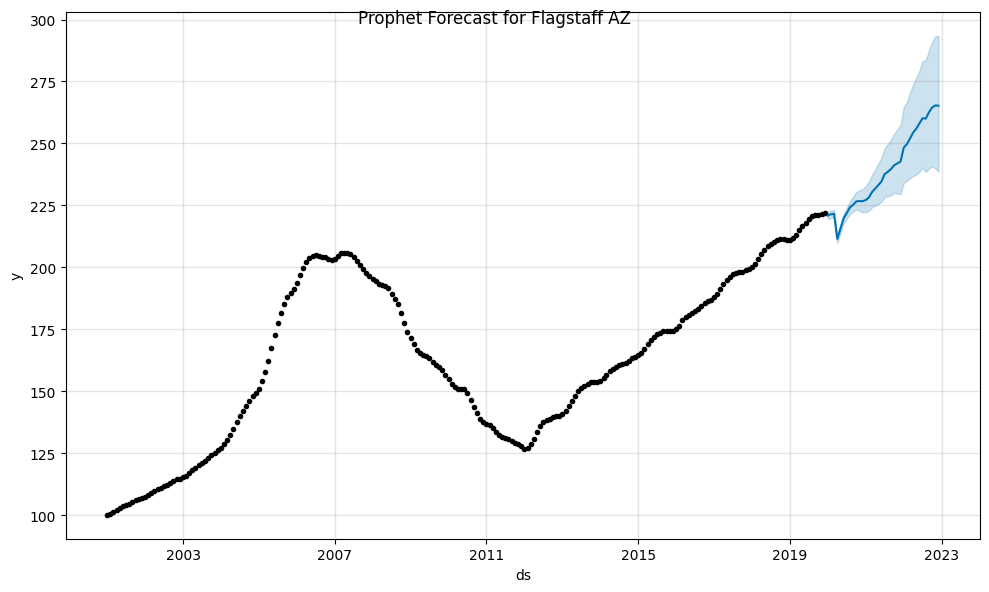

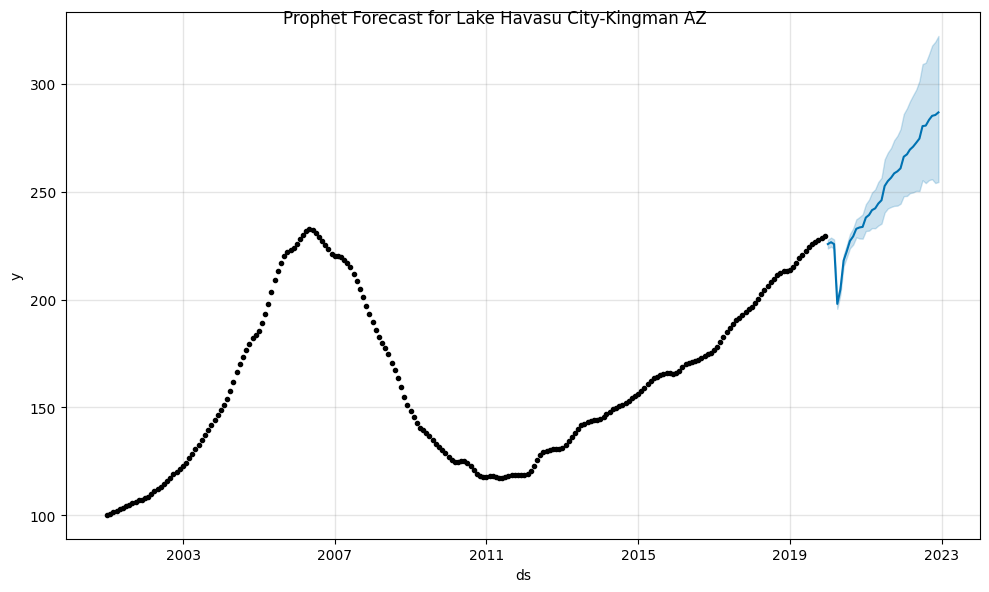

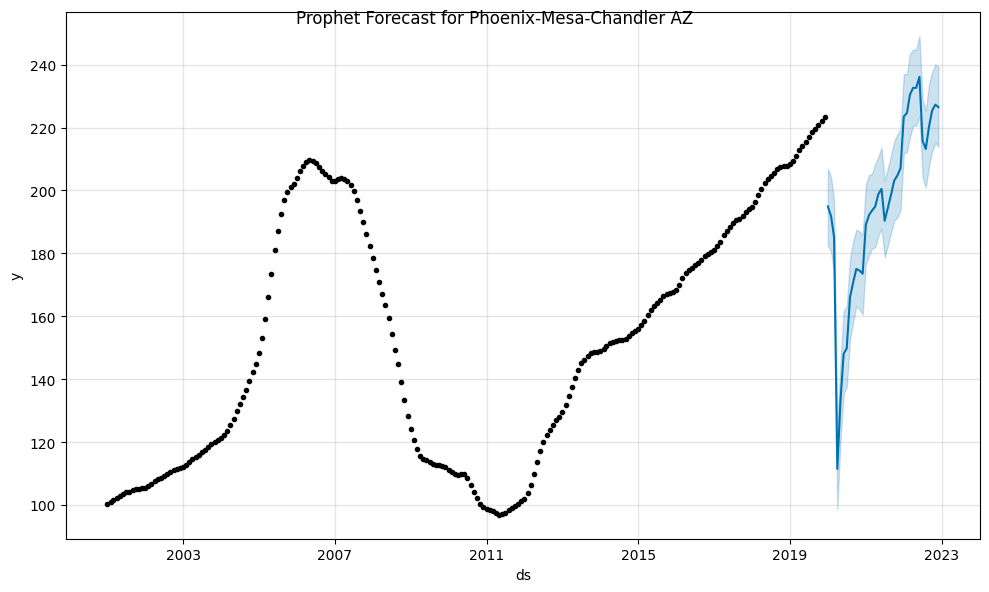

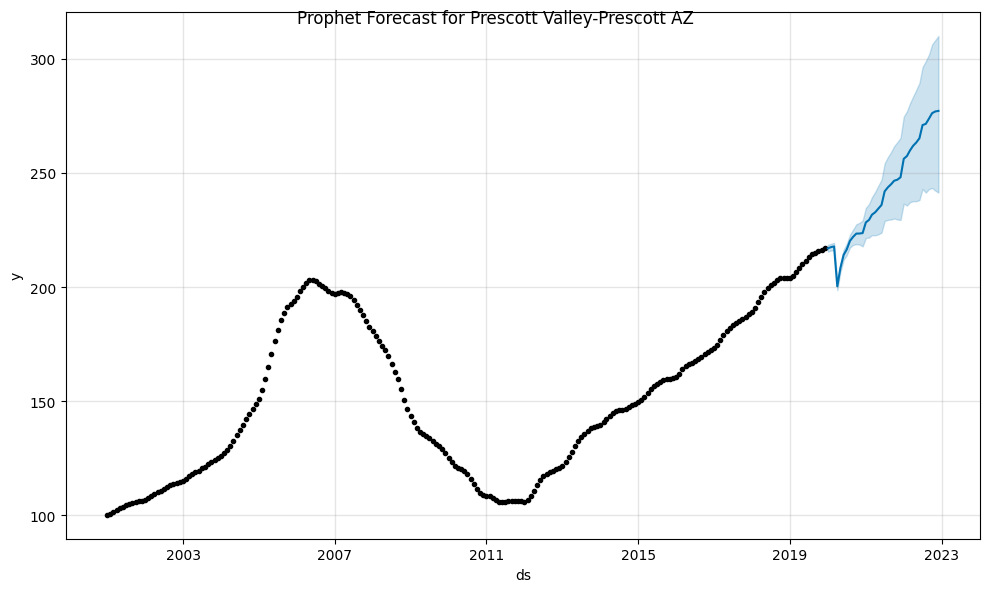

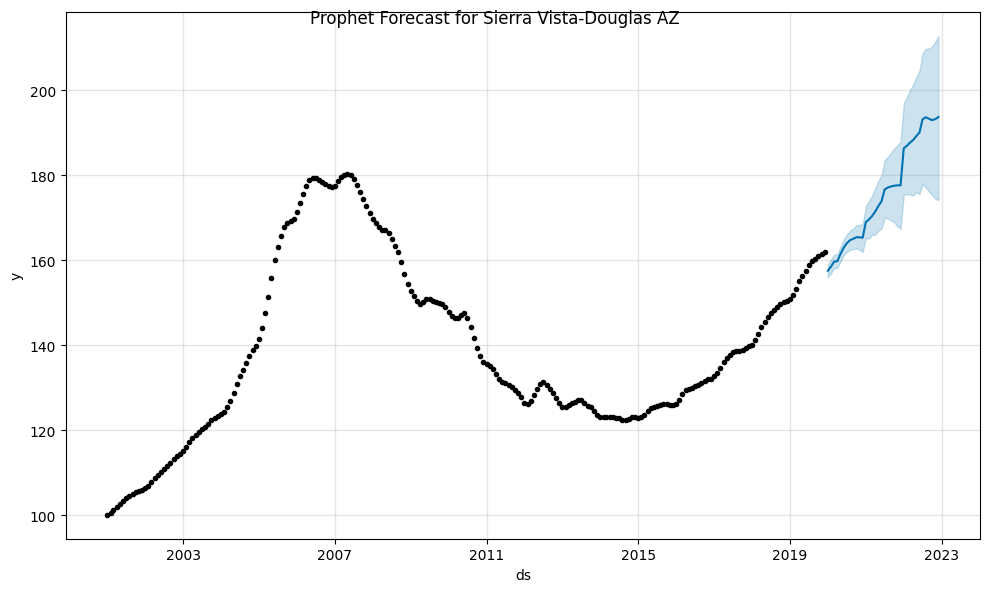

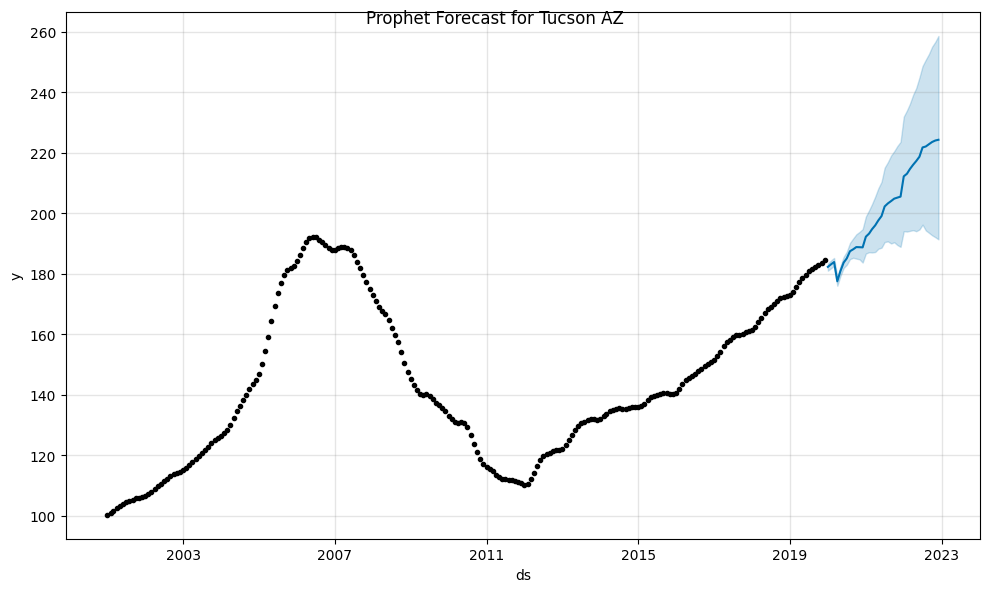

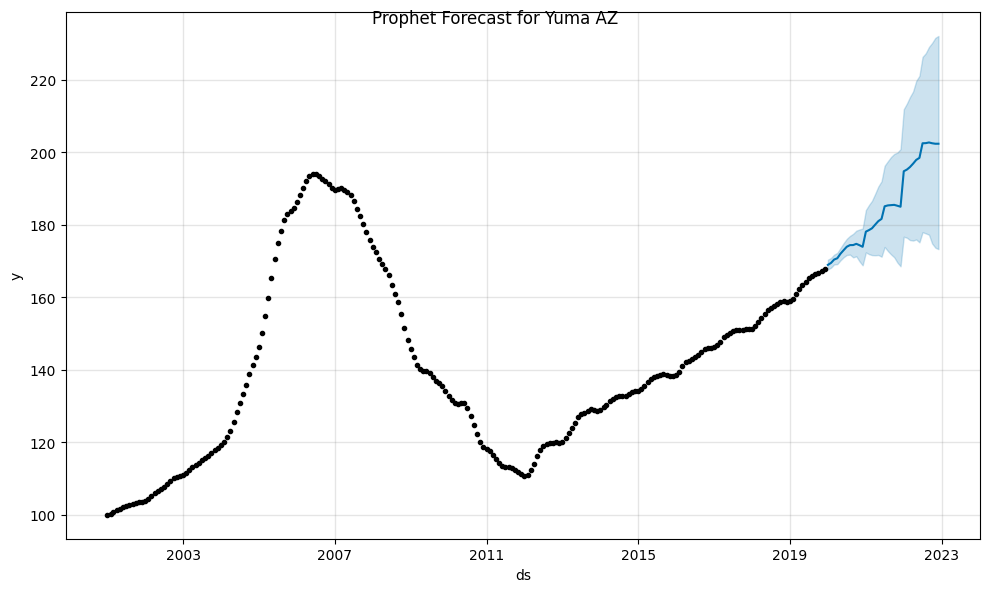

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Assuming your dataset is stored in a DataFrame named 'df'
# Make sure to install the required libraries: pip install pandas fbprophet scikit-learn

# Load your dataset
df = pd.read_excel('Final Data (2).xlsx')

# Combine 'Year' and 'Month' columns into a single datetime column
df['ds'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Fill NaN values in the 'population' column with the mean
df['Population'].fillna(df['Population'].mean(), inplace=True)

# Prepare the data for Prophet
prophet_data = df[['ds', 'CPI', 'Median Income', 'MORTGAGE', 'Population', 'Unemployment Rate', 'GDP', 'GEO_Name', 'Index_NSA']].rename(columns={'ds': 'ds', 'CPI': 'cpi', 'Median Income': 'median_income', 'MORTGAGE': 'mortgage', 'Population': 'population', 'Unemployment Rate': 'unemployment_rate', 'GDP': 'gdp', 'GEO_Name': 'region', 'Index_NSA': 'y'})

# Create a separate model for each GEO_Name
geo_names = df['GEO_Name'].unique()
models = {}
mae_values = []
mse_values = []
rmse_values = []

for geo_name in geo_names:
    # Filter data for the current GEO_Name
    geo_data = prophet_data[prophet_data['region'] == geo_name]

    # Check if 'cpi' regressor is present in the region's data
    if 'cpi' not in geo_data.columns:
        geo_data['cpi'] = 0  # You can replace 0 with a suitable default value or use a different imputation method

    # Split data into training and validation
    train_data = geo_data[geo_data['ds'] < '2020-01-01']
    valid_data = geo_data[geo_data['ds'] >= '2020-01-01']

    # Create and fit the Prophet model
    model = Prophet()
    model.add_regressor('cpi')
    model.add_regressor('median_income')
    model.add_regressor('mortgage')
    model.add_regressor('population')
    model.add_regressor('unemployment_rate')
    model.add_regressor('gdp')

    model.fit(train_data)

    # Make predictions on the validation set
    forecast = model.predict(valid_data)

    # Store the model for later use
    models[geo_name] = model

    # Calculate and append accuracy metrics
    mae = mean_absolute_error(valid_data['y'], forecast['yhat'])
    mse = mean_squared_error(valid_data['y'], forecast['yhat'])
    rmse = sqrt(mse)

    mae_values.append(mae)
    mse_values.append(mse)
    rmse_values.append(rmse)

    # Plot the predictions
    fig = model.plot(forecast)
    fig.suptitle(f'Prophet Forecast for {geo_name}')

# Calculate combined metrics
combined_mae = sum(mae_values) / len(mae_values)
combined_mse = sum(mse_values) / len(mse_values)
combined_rmse = sum(rmse_values) / len(rmse_values)

print(f"Combined MAE: {combined_mae}")
print(f"Combined MSE: {combined_mse}")
print(f"Combined RMSE: {combined_rmse}")

# To make future predictions:
future = model.make_future_dataframe(periods=12, freq='M')